# Jupyter Notebook - MNIST Dataset


### Step 1: Exploratory Data Analysis


In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read image files
def loadImageFiles(file_image):
    f = open(file_image, "rb")
    f.read(16)
    pixels = 28 * 28
    array_imgs = []

    while True:
        try:
            img = []
            for j in range(pixels):
                pix = ord(f.read(1))
                img.append(pix/255)
            array_imgs.append(img)
        except:
            break
        
    f.close()
    array_imgs = np.array(array_imgs)
    return array_imgs

In [5]:
# function to see images
def show_image(image):
    image_2d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(image_2d, interpolation = "nearest", cmap = "gray")
    plt.show()
    return

dim train-set:  (60000, 784)


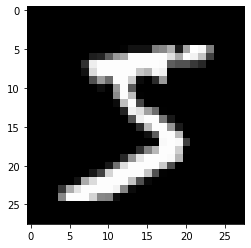

In [6]:
# load the train-images
train_images = loadImageFiles("../dataset/train-images.idx3-ubyte")
print("dim train-set: ", train_images.shape)
show_image(train_images[0])

dim test-set:  (10000, 784)


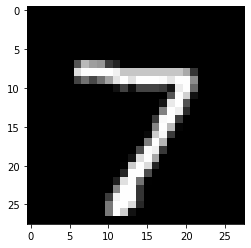

In [7]:
# load the test-images
test_images = loadImageFiles("../dataset/t10k-images.idx3-ubyte")
print("dim test-set: ", test_images.shape)
show_image(test_images[0])

In [8]:
# read labels 
def loadLabelFiles(file_label):
    f = open(file_label, "rb")
    f.read(8)
    array_labels = []

    while True:
        row = [0 for x in range(10)]
        try:
            label = ord(f.read(1))
            row[label] = 1
            array_labels.append(row)
        except:
            break
    
    f.close()
    array_labels = np.array(array_labels)
    return array_labels

In [9]:
# load the train-labels
train_labels = loadLabelFiles("../dataset/train-labels.idx1-ubyte")
print(train_labels[0])

[0 0 0 0 0 1 0 0 0 0]


In [10]:
# load the test-labels
test_labels = loadLabelFiles("../dataset/t10k-labels.idx1-ubyte")
print(test_labels[0])

[0 0 0 0 0 0 0 1 0 0]


### Step 2: Implementing Neural Network Architecture

In [17]:
# import modules
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K 
from keras.layers import BatchNormalization


In [13]:
# reshaping the arrays of images for tensor format
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
print("dim train-images: ", x_train.shape)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)
print("dim test-images: ", x_test.shape)

dim train-images:  (60000, 28, 28, 1)
dim test-images:  (10000, 28, 28, 1)


In [14]:
# reshaping the arrays of labels
y_train = train_labels
print("dim train-labels: ", y_train.shape)
y_test = test_labels
print("dim test-labels: ", y_test.shape)

dim train-labels:  (60000, 10)
dim test-labels:  (10000, 10)


In [18]:
# implementing neural network architecture
model = Sequential()

# conv-layer 1
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(Activation("relu"))
BatchNormalization(axis = -1)

# conv-layer 2
model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
BatchNormalization(axis = -1)

# conv-layer 3
model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation("relu"))
BatchNormalization(axis = -1)

# conv-layer 4
model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# flatten
model.add(Flatten())
BatchNormalization()

# fully-connected layer
model.add(Dense(512))
model.add(Activation("relu"))
BatchNormalization()
model.add(Dropout(rate = 0.2))

# output-layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [19]:
# compile model
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [20]:
# train the neural network
model.fit(x_train, y_train, batch_size = 100,
          epochs = 20, verbose = 2, validation_split = 0.2)

Epoch 1/20
480/480 - 104s - loss: 0.1822 - accuracy: 0.9423 - val_loss: 0.0621 - val_accuracy: 0.9818 - 104s/epoch - 217ms/step
Epoch 2/20
480/480 - 127s - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0399 - val_accuracy: 0.9878 - 127s/epoch - 265ms/step
Epoch 3/20
480/480 - 109s - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9894 - 109s/epoch - 227ms/step
Epoch 4/20
480/480 - 125s - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0314 - val_accuracy: 0.9914 - 125s/epoch - 260ms/step
Epoch 5/20
480/480 - 95s - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0476 - val_accuracy: 0.9885 - 95s/epoch - 198ms/step
Epoch 6/20
480/480 - 92s - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0399 - val_accuracy: 0.9904 - 92s/epoch - 191ms/step
Epoch 7/20
480/480 - 93s - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0327 - val_accuracy: 0.9933 - 93s/epoch - 194ms/step
Epoch 8/20
480/480 - 95s - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0422 - val_accuracy: 0.9902 - 95s/epo

In [21]:
# evaluate the performance 
score = model.evaluate(x_test, y_test, verbose = 1)
print("test-loss = ", score[0])
print("test-accuracy = ", score[1])

313/313 [==============================] - 7s 22ms/step - loss: 0.0360 - accuracy: 0.9920
test-loss =  0.035957444459199905
test-accuracy =  0.9919999837875366


### Step 3: Save the model

In [22]:
# save the model structure
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [23]:
# save the parameters
model.save_weights("weights.h5")

### Step 4: Load model and weigths and make predictions

In [1]:
# load the model
json_file = open("model.json", "r")
model_json = json_file.read()
json_file.close()

In [2]:
# load the parameters
from keras.models import model_from_json
model = model_from_json(model_json)
model.load_weights("weights.h5")
model.compile(loss = "categorical_crossentropy", optimizer = "adam",
              metrics = ["accuracy"])

In [10]:
# preprocess image
from PIL import Image
import numpy as np

img = Image.open("../app_mnist/static/images/five.png")
img = img.convert("L")
img_sized = img.resize((28, 28))
x = np.asarray(img_sized)
x = x.reshape((1, 28, 28, 1))

In [11]:
# make predictions
prediction = model.predict(x)

class_pred = np.argmax(prediction, axis = 1)
print(prediction[0])
print(class_pred)

1/1 [==============================] - 0s 48ms/step
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[5]


### Step 5: Preprocessing of image data

In [18]:
from PIL import Image

img = Image.open("../image2.png")
img = img.convert('L')
img_sized = img.resize((28, 28))
img_sized.show()

In [17]:
# reshape
import numpy as np

x = np.asarray(img_sized)
x = x.reshape((1, 28, 28, 1))
x.shape


(1, 28, 28, 1)

In [12]:
import os
dir = 'static/images'
filname = 'one.png'
root = os.path.join(dir, filname)
print(root)

static/images\one.png
